# AI for Biotechnology
<span style="color:#AAA;font-size:14px;" >Prof. Dr. Dominik Grimm</span>  
<span style="color:#AAA;font-size:14px;">Bioinformatics Research Lab</span>  
<span style="color:#AAA;font-size:14px;">TUM Campus Straubing for Biotechnology and Sustainability</span>  

## Exercise 3
### Exercise 3.2 
The following numpy matrix is given:

In [1]:
import numpy as np

confusion_table = np.array([[190,210],[10,3590]])
print(confusion_table)

[[ 190  210]
 [  10 3590]]


Compute accuracy, precision, recall, F1-Score, specificity, false positive rate and Matthew's Correleation Coefficient using standard Python/NumPy code and check your results by comparing the numbers to your solution from Exercise 3.1:

In [2]:
#Write down your code here
tp = confusion_table[0,0]
tn = confusion_table[1,1]
fp = confusion_table[0,1]
fn = confusion_table[1,0]

acc = (tp+tn)/(tp+tn+fp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = (2*tp)/(2*tp+fp+fn)
specificity = tn / (fp+tn)
fpr = fp / (fp+tn)
mcc = (tp*tn-fp*fn) / np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

print("Accuracy\t\t%.3f" % acc)
print("Precision\t\t%.3f" % precision)
print("Recall\t\t\t%.3f" % recall)
print("F1-Score\t\t%.3f" % f1)
print("Specificity\t\t%.3f" % specificity)
print("False Positive Rate\t%.3f" % fpr)
print("MCC\t\t\t%.3f" % mcc)

Accuracy		0.945
Precision		0.475
Recall			0.950
F1-Score		0.633
Specificity		0.945
False Positive Rate	0.055
MCC			0.650


### Exercise 3.3 
First we will create some toy data for a binary classification problem:

In [3]:
%matplotlib inline
import pylab as pl
from sklearn.datasets import make_classification

[X,y] = make_classification(n_samples=1000, n_features=50,n_classes=2,flip_y=0.1,
                            class_sep=0.7,random_state=42,n_informative=20)

#### E3.3 a)
Write Python code to familiarize yourself with the data. How many features and samples does the dataset have? What is the ratio between the positive and the negative class?

In [4]:
#write your code here
print("#Samples:\t\t", X.shape[0])
print("#Features:\t\t", X.shape[1])
print("#Negative Samples:\t", (y==0).sum())
print("#Positive Samples:\t", (y==1).sum())
print("Class Ratio:\t\t", (y==1).sum()/y.shape[0])

#Samples:		 1000
#Features:		 50
#Negative Samples:	 498
#Positive Samples:	 502
Class Ratio:		 0.502


#### E3.3 b)
Train a predictive model using k-Nearest-Neighbor classifier on the above created artificial dataset. Use for this example a Train-Val-Test split with a test- and validation size of 20%. The k-NN algorithm should use the euclidean distance (you could either use your own implementation from the last exercise or the implementation from sklearn). Performe a line-search for $k \in \{1,\dots,50\}$ and select the best performing model using the accuracy. Report at the end the selected hyperparameter, the accuracy on the validation data and on the test data. Does your model generalize on new data? Can you be certain that the results are true for a different train-val-test split?

Best k=	19
Best Accuracy (Val):	0.88
Accuracy on Test:	0.79


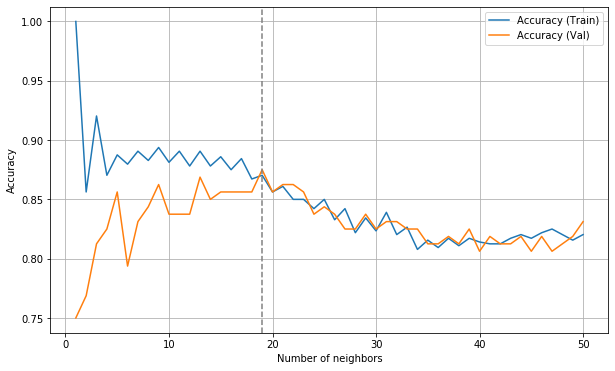

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics


#Train-Val-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size = 0.2) 

#try out different k's and plot training and testing error
neighbors = np.arange(1,51)
acc_train = [] 
acc_test = []

#Perform line-search to find best k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm="brute",metric="minkowski",p=2)
    knn.fit(X_subtrain, y_subtrain) 
    predictions_training = knn.predict(X_subtrain) 
    predictions_testing = knn.predict(X_val) 
    
    #Store Accuracy
    acc_train.append(metrics.accuracy_score(y_subtrain,predictions_training))
    acc_test.append(metrics.accuracy_score(y_val,predictions_testing))

#Best k?
best_k = neighbors[np.argmax(acc_test)]
print("Best k=\t" + str(best_k))
print("Best Accuracy (Val):\t%.2f" % acc_test[np.argmax(acc_test)])
    
#now retrain model with best k on full training set and predict on test
knn = KNeighborsClassifier(n_neighbors=best_k,algorithm="brute",metric="minkowski",p=2)
knn.fit(X_train, y_train) 
y_prediction = knn.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test,y_prediction)
print("Accuracy on Test:\t%.2f"%test_accuracy)

#Plot performance for different k values
pl.figure(figsize=(10,6))
pl.grid()
pl.plot(neighbors, acc_train,label="Accuracy (Train)") 
pl.plot(neighbors, acc_test,label="Accuracy (Val)") 
pl.axvline(best_k,color="grey",linestyle="dashed")
pl.xlabel('Number of neighbors') 
pl.ylabel('Accuracy') 
pl.legend()

#### E3.3 c)
Implement a 5-fold stratified cross-validation with an internal line-search for $k \in \{1,\dots,50\}$ and a train-val split of 20%. Select the hyperparameters by optimizing the accuracy and retrain your model with the best $k$ for each fold. What is the mean accuracy on the validation and testing data (also report the standard deviation)? What is the mean $k$ across all folds? (Hint: The code might take some time to finish the computations $\sim 1-2 min$)

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#initialize Cross-Validation 
kf = StratifiedKFold(n_splits=5)

best_acc_val = []
best_acc_test = []
best_neighbors = []

#Perform cross-valudation
for train_index, test_index in kf.split(X,y):
    #Split data in each iteration
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    #Create train-test split für hyperparameter optimization (line-seach)
    X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size = 0.2)
    neighbors = np.arange(1,51)
    
    acc_train = [] 
    acc_val = []

    #Perform line search to find best k
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
        knn.fit(X_subtrain, y_subtrain) 
        predictions_training = knn.predict(X_subtrain) 
        predictions_testing = knn.predict(X_val) 
    
        #Store Accuracy
        acc_train.append(metrics.accuracy_score(y_subtrain,predictions_training))
        acc_val.append(metrics.accuracy_score(y_val,predictions_testing))
    
    #Store information to best model in line-search
    best_k = neighbors[np.argmax(acc_val)]
    best_neighbors.append(best_k)
    best_acc_val.append(acc_val[np.argmax(acc_val)])
    
    #retrain Model with best k and predict on test data
    knn = KNeighborsClassifier(n_neighbors=best_k,metric="minkowski",p=2)
    knn.fit(X_train, y_train) 
    y_prediction = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test,y_prediction)
    best_acc_test.append(test_accuracy)

#transform python list into numpy array
best_neighbors = np.array(best_neighbors)
best_acc_val = np.array(best_acc_val)
best_acc_test = np.array(best_acc_test)
#print metrics
print("Average k: %.2f (+- %.2f)" % (best_neighbors.mean(),best_neighbors.std()))
print("Average Acc (Val): %.2f (+- %.2f)" % (best_acc_val.mean(),best_acc_val.std()))
print("Average Acc (Test): %.2f (+- %.2f)" % (best_acc_test.mean(),best_acc_test.std()))

Average k: 13.00 (+- 7.48)
Average Acc (Val): 0.86 (+- 0.02)
Average Acc (Test): 0.83 (+- 0.02)


#### 3.3 d) 
Copy your code from the cross-validation experiment above and extend it with precision and recall measures for the test data. However, you should still use the accuracy to find the best performing model.

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

kf = StratifiedKFold(n_splits=5)

best_acc_val = []
best_acc_test = []
best_precision_test = []
best_recall_test = []
best_neighbors = []

for train_index, test_index in kf.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    #Create train-test split für hyperparameter optimization
    X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size = 0.2)
    neighbors = np.arange(1,51)
    
    acc_train = [] 
    acc_val = []

    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
        knn.fit(X_subtrain, y_subtrain) 
        predictions_training = knn.predict(X_subtrain) 
        predictions_testing = knn.predict(X_val) 
    
        #Store Accuracy
        acc_train.append(metrics.accuracy_score(y_subtrain,predictions_training))
        acc_val.append(metrics.accuracy_score(y_val,predictions_testing))
    
    #Store information to best model in line-search
    best_k = neighbors[np.argmax(acc_val)]
    best_neighbors.append(best_k)
    best_acc_val.append(acc_val[np.argmax(acc_val)])
    
    #retrain Model with best k and predict on test data
    knn = KNeighborsClassifier(n_neighbors=best_k,metric="minkowski",p=2)
    knn.fit(X_train, y_train) 
    y_prediction = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test,y_prediction)
    best_acc_test.append(test_accuracy)
    best_precision_test.append(metrics.precision_score(y_test,y_prediction))
    best_recall_test.append(metrics.recall_score(y_test,y_prediction))

    
best_neighbors = np.array(best_neighbors)
best_acc_val = np.array(best_acc_val)
best_acc_test = np.array(best_acc_test)
best_recall_test = np.array(best_recall_test)
best_precision_test = np.array(best_precision_test)

print("Average k: %.2f (+- %.2f)" % (best_neighbors.mean(),best_neighbors.std()))
print("Average Accuracy (Val): %.2f (+- %.2f)\n" % (best_acc_val.mean(),best_acc_val.std()))
print("Average Accuracy (Test): %.2f (+- %.2f)" % (best_acc_test.mean(),best_acc_test.std()))
print("Average Precision (Test): %.2f (+- %.2f)" % (best_precision_test.mean(),best_precision_test.std()))
print("Average Recall (Test): %.2f (+- %.2f)" % (best_recall_test.mean(),best_recall_test.std()))

Average k: 18.60 (+- 9.56)
Average Accuracy (Val): 0.85 (+- 0.02)

Average Accuracy (Test): 0.84 (+- 0.02)
Average Precision (Test): 0.86 (+- 0.03)
Average Recall (Test): 0.82 (+- 0.06)
